In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
import pandas as pd

In [3]:
RPwomen = pd.read_csv('./Comments-Data/RedPillWomen_Comments.csv')
RPwomen = RPwomen[RPwomen.Author != '[deleted]']
RPwomen_au = pd.DataFrame(RPwomen.groupby('Author')['Score'].sum())
RPwomen_au['sub'] = 'RPwomen '

In [4]:
RPwomen_au.head()

,Score,sub
Author,,
-SoItGoes,12,RPwomen
-TheOutsid3r-,13,RPwomen
30303030303030,5,RPwomen
488Koala,2,RPwomen
4Blu,2,RPwomen


In [5]:
TRP = pd.read_csv('./Comments-Data/TheRedPill_Comments.csv')
TRP = TRP[TRP.Author != '[deleted]']
TRP_au = pd.DataFrame(TRP.groupby('Author')['Score'].sum())
TRP_au['sub'] = 'TRP '
TRP_au.head()

,Score,sub
Author,,
10199,12,TRP
35652424,-1,TRP
46xy,6,TRP
Adrn19,3,TRP
AnInvention,3,TRP


In [52]:
asktrp = pd.read_csv('./Comments-Data/asktrp_Comments.csv')
asktrp = asktrp[asktrp.Author != '[deleted]']
asktrp_au = pd.DataFrame(asktrp.groupby('Author')['Author'])
asktrp_au['sub'] = 'asktrp '
asktrp_au.head()

,0,1,sub
0,-HeartOfDark-,"4655 -HeartOfDark- Name: Author, dtype: object",asktrp
1,01234five,"4954 01234five Name: Author, dtype: object",asktrp
2,0io-,4004 0io- 4219 0io- 4229 0io- 4233 ...,asktrp
3,0sleepless,"3553 0sleepless Name: Author, dtype: object",asktrp
4,1BadDayAway,"4889 1BadDayAway Name: Author, dtype: object",asktrp


In [7]:
becomeaman = pd.read_csv('./Comments-Data/becomeaman_Comments.csv')
becomeaman = becomeaman[becomeaman.Author != '[deleted]']
becomeaman_au = pd.DataFrame(becomeaman.groupby('Author')['Score'].sum())
becomeaman_au['sub'] = 'becomeaman '
becomeaman_au.head()

,Score,sub
Author,,
-ATLAS-_,2,becomeaman
-Lupe,2,becomeaman
-MAurelius-,19,becomeaman
-SoItGoes,-1,becomeaman
-Steak-,1,becomeaman


In [8]:
G.add_node('RPWomen')

In [9]:
G.add_nodes_from([2, 3])

In [10]:
H = nx.path_graph(10)
>>> G.add_nodes_from(H)

In [11]:
G.add_edge(1, 2)

In [12]:
e = (2, 3)

In [13]:
G.add_edge(*e)

In [14]:
all_subs_au = pd.concat([becomeaman_au, RPwomen_au, TRP_au, asktrp_au], sort=True)
all_subs_au.tail()

,Score,sub
Author,,
zayelion,5,asktrp
zealouz,2,asktrp
zesto_is_besto,1,asktrp
zndas92,72,asktrp
zyk0s,4,asktrp


In [15]:
relation = pd.DataFrame(all_subs_au.groupby('Author')['sub'].sum())

In [16]:
relation.head()

,sub
Author,
-ATLAS-_,becomeaman
-HeartOfDark-,asktrp
-Lupe,becomeaman
-MAurelius-,becomeaman
-SoItGoes,becomeaman RPwomen


In [17]:
R = nx.Graph()

In [18]:
R.add_nodes_from(['becomeaman', 'RPwomen', 'TRP', 'asktrp'])

In [19]:
R.nodes

NodeView(('becomeaman', 'RPwomen', 'TRP', 'asktrp'))

In [36]:
def new_edges(t):
    edges = []
    for i in range(len(t)):
        for j in range(i+1, len(t)):
            edges.append((t[i], t[j], 1))
    return edges

In [37]:
def add_weigths(t, Gr):
    edges = []
    for i in range(len(t)):
        for j in range(i+1, len(t)):
            Gr.edges[t[i], t[j]]['weight'] += 1

In [38]:
for Author in relation['sub']:
    sub = Author.split()
    if len(sub) > 1:
        R.add_weighted_edges_from(new_edges(sub))

In [39]:
c = R.edges['RPwomen', 'becomeaman']['weight']

In [40]:
for Author in relation['sub']:
    sub = Author.split()
    if len(sub) > 1:
        add_weigths(sub, R)

In [41]:
R.edges

EdgeView([('becomeaman', 'RPwomen'), ('becomeaman', 'asktrp'), ('becomeaman', 'TRP'), ('RPwomen', 'asktrp'), ('RPwomen', 'TRP'), ('TRP', 'asktrp')])

In [50]:
R.edges['RPwomen', 'TRP']

{'weight': 17}

In [45]:
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

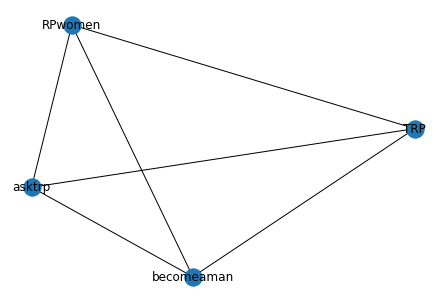

In [47]:
nx.draw(G, with_labels=True, font_weight='bold')